In [1]:
# Run this cell to import all the libraries you need for this exercise
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt


Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples


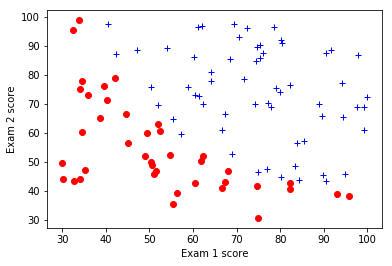

In [2]:
# File 'ex2data1.txt' contains data in 3 columns
# Columns 1 and 2 are exam scores
# Column 3 is the label

f = open('ex2data1.txt', 'r')
x1_list = []
x2_list = []
y_list = []

for line in f:
    x1_str, x2_str, y_str = line.split(',')
    x1_list.append(float(x1_str))
    x2_list.append(float(x2_str))
    y_list.append(float(y_str))

# Let's now plot the data
    
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples')

for i in range(0,len(y_list)):
    if y_list[i] == 1:
        plt.plot(x1_list[i],x2_list[i],'b+',linewidth=0)
    else:
        plt.plot(x1_list[i],x2_list[i],'ro',linewidth=0)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

In [3]:
# Set up X, y and initial_theta
x1 = np.matrix(x1_list).reshape(len(x1_list),1)
x2 = np.matrix(x2_list).reshape(len(x2_list),1)
y = np.matrix(y_list).reshape(len(y_list),1)
X = np.c_[np.ones(len(x1_list)),x1,x2]
initial_theta = np.zeros(3)

In [16]:
def sigmoid(z):
    # 
    # INSTRUCTIONS:
    # Write the code for sigmoid
    #
    # ====================== YOUR CODE HERE ======================
    return 1/(1+np.exp(-z))

def CostFunction(theta, X, y):
    # 
    # INSTRUCTIONS:
    # Write the code for CostFunction, which is a function that returns
    # the cost of using theta as the parameter of the logistic regression
    #
    # ====================== YOUR CODE HERE ======================
    H = sigmoid( np.dot(X, np.transpose(theta) ) )
    J = np.sum( np.dot(np.log(H), y) + np.log(1-H).dot(1-y)) / (-len(y))
    
    # ============================================================
    return J

def Gradient(theta, X, y):
    # 
    # INSTRUCTIONS:
    # Write the code for Gradient, which is a function that computes
    # the gradient  of the cost with respect to the parameters
    # using theta as the parameter of the logistic regression
    # 
    # ====================== YOUR CODE HERE ======================
    
    
    H = sigmoid( np.dot(X, np.transpose(theta) ) )
    grad = np.dot( np.transpose(X), (y - np.transpose(H)) ) / (-len(y))
    grad = np.array(grad.transpose().tolist()[0])
    # ============================================================
    return grad

# Compute and display initial cost and gradient
print('Cost at initial theta (zeros): ', CostFunction(initial_theta,X,y))
print('Gradient at initial theta (zeros): ')
print(Gradient(initial_theta,X,y))
                             

Cost at initial theta (zeros):  0.6931471805599453
Gradient at initial theta (zeros): 
[ -0.1        -12.00921659 -11.26284221]


In [7]:
# Run optimize function
initial_theta = np.zeros(3)
result = opt.minimize(fun=CostFunction,x0=initial_theta,args=(X,y),method='TNC',jac=Gradient)
print('Cost at theta: ', CostFunction(result.x,X,y))
print('theta: ')
print(result.x)

Cost at theta:  0.20349770158947472
theta: 
[-25.16131857   0.20623159   0.20147149]


In [8]:
# Predict probability that a student with score 45 on exam 1 
# and score 85 on exam 2 will be admitted
theta_min = np.matrix(result.x).reshape(3,1)
prob = sigmoid(np.matmul(np.matrix('1 45 85'),theta_min))
print('For a student with scores 45 and 85, we predict an admission probability of ', prob)


For a student with scores 45 and 85, we predict an admission probability of  [[0.77629062]]


In [14]:
def Predict(theta, X):
    # 
    # INSTRUCTIONS:
    # Write the code for Predict, which is a function that returns
    # a (m x 1)-matrix of the 0's and 1's representing the predictions
    # 
    # ====================== YOUR CODE HERE ======================
    # 
    H = sigmoid(np.dot(X, theta))
    pred = 1*(H>=0.5)
    pred = pred.transpose()
    return pred

# Compute accuracy on our training set
p = Predict(theta_min, X)
print('Accuracy of predictions: ', np.sum(np.equal(p,y_list)),'%')


Accuracy of predictions:  89 %
